In [6]:
import pandas as pd
# import json
import os
os.chdir("c:\\Users\\gauthier.delvoye\\Documents\\Projets\\Perso\\mtg-cube")
from back.src.filter import format_bulk_df, filter_by_extension, remove_doublon, format_oracle_text
print(os.getcwd())

c:\Users\gauthier.delvoye\Documents\Projets\Perso\mtg-cube


In [10]:
# import json
# data_path = "data/default-cards-20240501090530.json"
# with open(data_path, "r") as data_json:
#     data = json.load(data_json)
# data_path = "data/default-cards-20240504210746.json"
# df_bulk = pd.read_json(data_path)
# df_clean = format_bulk_df(df_bulk)
# df_clean.to_json("data/data_clean.json")

In [9]:
df_drop = pd.read_json("data/data_clean.json")
df_drop.head(5)

,name,lang,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,set,set_name,rarity,prices,card_faces
0,Fury Sliver,en,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,3,3,[R],[R],[],tsp,Time Spiral,uncommon,0.42,None
1,Kor Outfitter,en,{W}{W},2.0,Creature — Kor Soldier,"When Kor Outfitter enters the battlefield, you...",2,2,[W],[W],[],zen,Zendikar,common,0.15,None
2,Spirit,en,,0.0,Token Creature — Spirit,Flying,1,1,[W],[W],[Flying],tmm2,Modern Masters 2015 Tokens,common,0.12,None
3,Siren Lookout,en,{2}{U},3.0,Creature — Siren Pirate,Flying\nWhen Siren Lookout enters the battlefi...,1,2,[U],[U],"[Flying, Explore]",xln,Ixalan,common,0.03,None
4,Web,en,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,None,None,[G],[G],[Enchant],3ed,Revised Edition,rare,0.67,None


In [4]:
# df_drop[df_drop["oracle_text"].str.contains("fly", na=False)].head(1)

In [5]:
# df_drop[df_drop["set_name"].str.contains("Throne")]

In [8]:
# df_drop["set_name"].unique()

In [63]:
df_test = pd.DataFrame({"oracle_text": [None, "b"], "card_faces": [[{"text": "a1"}, {"text": "a2"}], None]})
df_test

,text,twice_text
0,None,"[{'text': 'a1'}, {'text': 'a2'}]"
1,b,None


In [4]:
df_test = pd.DataFrame({"oracle_text": [None, "b"], "card_faces": [[
    {
        "type_line": "Creature",
        "oracle_text": "a1"
    }, {
        "type_line": "Instant - Adventure",
        "oracle_text": "a2"
    }
], None]})
df_test
# def merge_two_sided_card_text_into_text_cell(
#     text_cell: Optional[str],
#     two_sided_text_cell: Optional[list[dict[str, str]]]
# ) -> str:
#     if text_cell is not None:
#         return text_cell
#     if two_sided_text_cell is not None:
#         merged_text = ""
#         for dict_sided in two_sided_text_cell:
#             merged_text += dict_sided["type_line"]+": "
#             merged_text += dict_sided["oracle_text"] + "\n"
#         return merged_text[:-3]
#     return None
# df_test["oracle_text"] = df_test.apply(lambda x: merge_two_sided_card_text_into_text_cell(x["oracle_text"], x["card_faces"]), axis=1)
# df_test


,oracle_text,card_faces
0,None,"[{'type_line': 'Creature', 'oracle_text': 'a1'..."
1,b,None


In [20]:
"Promo" or "Token" in "blabla_Proo"

'Promo'

In [45]:
def sort_expansion(list_edition: list[str]) -> dict[list[str]]:
    d = {}
    
    d["keeped"] = []
    for edition_name in list_edition:
        wanted = True
        for word in [
            "Promo",
            "Token",
            "Substitute",
            "Friday Night",
            "Commander",
            "Masters",
            "Remastered",
            "World Championship",
            "Duel Deck",
            "Booster",
            "Collector",
            "Anniversary",
            "Art Series",
            "Gift Cards",
            "Global Series",
            "Introductory",
            "Game Night",
            "Guild Kit",
            "Magic Player Rewards",
            "Comic-Con",
            "Arena League",
            "MagicFest",
            "New Year",
            "Challenge",
            "Online Store",
            "Challenger",
            "Minigames",
            "Regional Championship",
            "Dragon Con",
            "Magic Premiere",
            "Love Your LGS",
            "Eternal Weekend",
            "Heroes of the Realm",
            "Junior Series",
            "Wizards Play Network",
            "HasCon", 
            "DCI Legend",
            "Championships",
            "Treasure Chest",
            "Signature Spellbook",
            "Deck", 
            "From the Vault",
            "Historic Anthology",
            "Junior",
            "Comics",   
        ]:
            if word in edition_name:
                wanted = False
                if word not in d.keys():
                    d[word] = []
                else:
                    d[word].append(edition_name)
        if wanted:
            d["keeped"].append(edition_name)
    return d

d = sort_expansion(['Time Spiral', 'Zendikar', 'Modern Masters 2015 Tokens', 'Ixalan',
       'Revised Edition', 'Doctor Who', 'Wilds of Eldraine',
       'Throne of Eldraine', "Ugin's Fate", 'Core Set 2021',
       'Dominaria United', 'Secret Lair Drop', 'Masters Edition IV',
       'Prophecy', 'The List', 'Commander 2015', 'Commander 2018',
       'Friday Night Magic 2008', 'The Lost Caverns of Ixalan Promos',
       'March of the Machine', "Collectors' Edition",
       'Dominaria Remastered', 'Magic Online Promos', 'Guilds of Ravnica',
       'Conspiracy', 'New Phyrexia', 'Gatecrash',
       'Tales of Middle-earth Commander',
       'Outlaws of Thunder Junction Tokens',
       'Wilds of Eldraine Commander', 'Time Spiral Remastered',
       'Dominaria', 'Core Set 2019', 'Visions', 'Ravnica Remastered',
       'Commander 2020', 'Odyssey', 'Innistrad', 'Modern Horizons 2',
       'Arabian Nights', 'Aether Revolt', '30th Anniversary Edition',
       'Mirage', 'Chronicles Foreign Black Border', 'Mirrodin Besieged',
       'New Capenna Commander',
       "Commander Legends: Battle for Baldur's Gate",
       'Innistrad: Crimson Vow Tokens', 'Dragons of Tarkir',
       'Alchemy: Phyrexia', 'Oath of the Gatewatch', 'Ninth Edition',
       'Outlaws of Thunder Junction', 'Modern Masters',
       'Portal Second Age', 'Vintage Masters',
       'Duel Decks: Jace vs. Vraska', 'Zendikar Rising Art Series',
       "Urza's Destiny", 'The Lord of the Rings: Tales of Middle-earth',
       'Double Masters 2022', 'Seventh Edition', 'Ravnica Allegiance',
       'Eternal Masters', 'Unglued', 'Arena League 2003',
       "The Brothers' War Commander", 'Masters Edition II', 'Magic 2013',
       'Kaldheim Commander', 'Modern Masters 2017', 'Unhinged',
       'Battle for Zendikar', 'Shadows over Innistrad Remastered',
       'Modern Masters 2015', 'GRN Guild Kit', 'Alchemy: Dominaria',
       'Commander 2016', 'Zendikar Rising Commander',
       'Saviors of Kamigawa', 'Phyrexia: All Will Be One Promos',
       'Ikoria: Lair of Behemoths Promos', 'Fifth Edition',
       '15th Anniversary Cards', 'Treasure Chest',
       'The Lost Caverns of Ixalan', 'Amonkhet', 'Invasion',
       'March of the Machine Commander', 'Modern Horizons',
       'World Championship Decks 1998', 'Time Spiral Timeshifted',
       'Core Set 2019 Promos', 'Innistrad: Midnight Hunt',
       'Fourth Edition Foreign Black Border', 'Jumpstart 2022',
       'Arena Beginner Set', 'Kamigawa: Neon Dynasty', 'Commander 2021',
       'Streets of New Capenna', 'Nemesis', 'Battle Royale Box Set',
       'Portal', 'Fallout', 'Dominaria United Commander',
       'Commander Masters', 'Strixhaven: School of Mages Promos',
       'Shadows over Innistrad Tokens', 'Betrayers of Kamigawa',
       'Hour of Devastation', 'Commander 2017', 'Khans of Tarkir',
       'Journey into Nyx Promos', 'Mystery Booster Playtest Cards 2019',
       'Commander 2014', 'Shadows of the Past',
       'Streets of New Capenna Promos', 'Kaladesh Promos',
       'Zendikar Rising Promos', 'Strixhaven: School of Mages',
       'Murders at Karlov Manor', 'Eighth Edition',
       'Limited Edition Beta', 'Mercadian Masques',
       'Core Set 2021 Promos', 'World Championship Decks 2001',
       'Amonkhet Remastered', 'Conflux', 'Kaldheim Promos',
       'Duel Decks: Izzet vs. Golgari Tokens', 'Commander Legends',
       'Rise of the Eldrazi', 'March of the Machine: The Aftermath',
       "Intl. Collectors' Edition", 'Conspiracy: Take the Crown',
       'Fate Reforged', 'Theros Beyond Death Promos',
       'Outlaws of Thunder Junction Commander', 'Coldsnap',
       'War of the Spark Promos', 'Zendikar Rising', 'Magic Origins',
       'Modern Horizons Tokens', 'Future Sight', 'Salvat 2011',
       'Dominaria Promos', 'Planechase Anthology Planes',
       'Alchemy: Innistrad', 'The Lost Caverns of Ixalan Tokens',
       'Innistrad: Double Feature', 'Mystery Booster Playtest Cards 2021',
       'San Diego Comic-Con 2015', 'Judgment', 'Commander 2021 Tokens',
       'Unfinity', 'Fourth Edition', 'Doctor Who Tokens', 'Eventide',
       'Ikoria: Lair of Behemoths', 'Hachette UK', 'Explorers of Ixalan',
       'Portal Three Kingdoms', 'Phyrexia: All Will Be One Art Series',
       'Jumpstart: Historic Horizons', "Alchemy Horizons: Baldur's Gate",
       'Tenth Edition', 'Warhammer 40,000 Commander', "The Brothers' War",
       'Planechase Anthology Tokens', 'Kaladesh',
       'Ravnica: City of Guilds', 'Pro Tour Collector Set',
       'The Lost Caverns of Ixalan Commander', 'Midnight Hunt Commander',
       'Ice Age', 'Outlaws of Thunder Junction Promos',
       'Summer Magic / Edgar', 'Commander Masters Art Series',
       'Dominaria United Art Series', 'MKM Japanese Promo Tokens',
       'Modern Horizons 2 Promos', 'War of the Spark',
       'Wilds of Eldraine Art Series', 'Crimson Vow Art Series',
       'Commander 2013', 'Judge Gift Cards 2006',
       'Neon Dynasty Commander', 'Friday Night Magic 2016',
       'Starter Commander Decks', 'Rivals of Ixalan', 'Alliances',
       'Unlimited Edition', 'Guildpact', 'Double Masters', 'Magic 2014',
       'Darksteel', 'Scars of Mirrodin',
       'Adventures in the Forgotten Realms Promos',
       'World Championship Decks 1997', 'Classic Sixth Edition',
       'Game Night: Free-for-All', 'Jurassic World Collection',
       'Commander 2011', 'Dissension', 'Magic 2012', 'Resale Promos',
       'Magic 2011', 'Zendikar Rising Expeditions',
       'World Championship Decks 2003', 'Alara Reborn',
       'Phyrexia: All Will Be One Commander', 'Multiverse Legends',
       'Kaladesh Remastered', 'Commander Masters Tokens',
       'Champions of Kamigawa', 'Homelands', 'Core Set 2020',
       'Ravnica: Clue Edition', 'Mirrodin', 'Planechase 2012 Planes',
       'Planechase', 'Rinascimento', 'Unstable', 'Welcome Deck 2016',
       'Adventures in the Forgotten Realms', 'Fifth Dawn',
       'Iconic Masters', 'Rivals of Ixalan Promos', 'Ultimate Masters',
       'Dominaria United Jumpstart Front Cards',
       'March of the Machine Commander Tokens', 'Unfinity Tokens',
       'Morningtide', 'Innistrad: Crimson Vow',
       'Tales of Middle-earth Front Cards', 'Judge Gift Cards 2020',
       'Kamigawa: Neon Dynasty Promos', 'Jumpstart',
       'Commander Anthology Volume II', 'Duel Decks: Mind vs. Might',
       'Innistrad: Crimson Vow Promos', 'Masters Edition', 'Tempest',
       'Premium Deck Series: Slivers', 'Arena League 2000', 'Anthologies',
       'Shadows over Innistrad', 'Historic Anthology 5',
       'Strixhaven Art Series', 'Theros', "Urza's Saga", 'Magic 2015',
       'Zendikar Expeditions', 'Phyrexia: All Will Be One',
       'Return to Ravnica', "The Brothers' War Promos",
       'Murders at Karlov Manor Commander Tokens', 'Stronghold',
       'Wilds of Eldraine: Enchanting Tales', 'Modern Horizons 3',
       'Torment', 'Modern Masters Tokens',
       'Murders at Karlov Manor Promos', 'Historic Anthology 6',
       'Theros Beyond Death', 'Tales of Middle-earth Art Series',
       'Breaking News', 'Unfinity Sticker Sheets', 'Chronicles',
       'Duel Decks: Sorin vs. Tibalt', 'Born of the Gods',
       'Fallen Empires', 'Dark Ascension', 'Commander 2020 Oversized',
       'Tempest Remastered', 'DCI Promos',
       'Time Spiral Remastered Tokens',
       'Secret Lair 30th Anniversary Countdown Kit',
       'Duel Decks Anthology: Garruk vs. Liliana',
       'Duel Decks: Speed vs. Cunning', 'Modern Horizons Art Series',
       'World Championship Decks 1999', 'Kaldheim Commander Tokens',
       'Commander 2019', "Battle for Baldur's Gate Promos",
       'Commander Anthology', 'Commander 2014 Tokens',
       "Alchemy: The Brothers' War", 'Warhammer 40,000 Tokens',
       'Salvat 2005', 'Scourge', 'Wizards Play Network 2022',
       'Weatherlight', 'Throne of Eldraine Promos',
       'Duel Decks: Merfolk vs. Goblins', 'Renaissance',
       'Kaladesh Inventions', 'Modern Horizons 2 Art Series',
       "Battle for Baldur's Gate Tokens",
       'Zendikar Rising Commander Tokens', 'Friday Night Magic 2005',
       'Alchemy: Murders at Karlov Manor ',
       "The Brothers' War Art Series", 'Apocalypse',
       'Duel Decks Anthology: Divine vs. Demonic', 'Worldwake',
       'Eldritch Moon Promos', 'Planeshift', 'Shards of Alara',
       'Commander 2017 Tokens', 'Crimson Vow Commander',
       'New Capenna Commander Tokens', "Urza's Legacy",
       'Duels of the Planeswalkers', 'The Big Score',
       'Innistrad: Midnight Hunt Promos', 'Avacyn Restored',
       'Secret Lair: Ultimate Edition', 'Eldritch Moon', 'Shadowmoor',
       'Tales of Middle-earth Commander Tokens',
       'Murders at Karlov Manor Tokens', "Dragon's Maze", 'Exodus',
       'Signature Spellbook: Jace', 'Amonkhet Invocations',
       'Ravnica Allegiance Tokens', 'Masters 25', 'Planar Chaos',
       'The Lost Caverns of Ixalan Art Series', 'Historic Anthology 3',
       'Fallout Tokens', 'Amonkhet Promos',
       'Kamigawa: Neon Dynasty Tokens',
       'Global Series Jiang Yanggu & Mu Yanling', 'Magic Origins Promos',
       'Starter 1999', 'Foreign Black Border',
       'Shadows over Innistrad Promos', 'Kaldheim Tokens',
       'Forgotten Realms Commander', 'Starter Commander Deck Tokens',
       'Lorwyn Tokens', 'Duel Decks: Mirrodin Pure vs. New Phyrexia',
       'Ravnica Allegiance Promos', "The Brothers' War Retro Artifacts",
       'Welcome Deck 2017', 'Battle for Zendikar Promos',
       'Judge Gift Cards 2012', 'Premium Deck Series: Fire and Lightning',
       'Sega Dreamcast Cards', 'Hour of Devastation Promos',
       'Duel Decks: Ajani vs. Nicol Bolas',
       '30th Anniversary Play Promos', 'Magic Online Avatars',
       'Media Inserts', 'Kaldheim', 'Vanguard Series',
       'Strixhaven Mystical Archive', 'Judge Gift Cards 2014',
       'Commander 2016 Tokens',
       'Phyrexia: All Will Be One Commander Tokens',
       'Introductory Two-Player Set', 'Core Set 2020 Promos',
       'Wilds of Eldraine Promos', 'Oversized League Prizes',
       'Friday Night Magic 2013', 'Khans of Tarkir Tokens', 'Magic 2010',
       "Oversized 90's Promos", 'From the Vault: Dragons',
       'Duel Decks: Venser vs. Koth', 'Jumpstart 2022 Front Cards',
       'Legends', 'Limited Edition Alpha', 'Kaldheim Substitute Cards',
       'The Big Score Tokens', 'Commander 2015 Tokens',
       'Gatecrash Promos', 'Guilds of Ravnica Tokens',
       'Duel Decks: Knights vs. Dragons', 'Vintage Championship',
       'Battlebond', 'Planechase Anthology', 'Ultimate Masters Tokens',
       'March of the Machine Tokens', "Commander's Arsenal",
       'Judge Gift Cards 2013', 'Duel Decks Anthology: Jace vs. Chandra',
       'Wilds of Eldraine Commander Tokens', 'Journey into Nyx',
       'Special Guests', 'Modern Horizons 2 Tokens', 'Battlebond Promos',
       'IDW Comics Inserts', 'The List (Unfinity Foil Edition)',
       'Adventures in the Forgotten Realms Art Series', 'Lorwyn',
       'World Championship Decks 2000', 'Modern Masters 2017 Tokens',
       'Murders at Karlov Manor Art Series',
       'Murders at Karlov Manor Commander', 'Battle for Zendikar Tokens',
       'Magic Online Theme Decks', 'Japan Junior Tournament',
       'Duel Decks: Elves vs. Inventors',
       'Outlaws of Thunder Junction Art Series',
       'Legendary Cube Prize Pack', 'Duel Decks: Elspeth vs. Tezzeret',
       "Battle for Baldur's Gate Art Series", 'Legions',
       'Friday Night Magic 2007', 'Modern Event Deck 2014',
       'Duel Decks: Izzet vs. Golgari', 'Neon Dynasty Art Series',
       'Planechase Planes', 'Duel Decks: Phyrexia vs. the Coalition',
       'Duel Decks: Nissa vs. Ob Nixilis', 'Explorer Anthology 3',
       'Duel Decks: Elves vs. Goblins Tokens', 'Antiquities',
       'Game Night 2019', 'Arena League 2004', 'Friday Night Magic 2006',
       'Guilds of Ravnica Promos', 'Worldwake Tokens',
       'Magic Origins Clash Pack', 'Historic Anthology 4',
       'World Championship Decks 2002',
       'Strixhaven: School of Mages Minigames', 'Celebration Cards',
       'Tales of Middle-earth Promos', 'Ultimate Box Topper',
       'Ixalan Promos', 'Summer Vacation Promos 2022', 'RNA Guild Kit',
       'Core Set 2020 Tokens', 'Onslaught', 'Alchemy: New Capenna',
       '2022 Heroes of the Realm', 'Archenemy Schemes',
       'Friday Night Magic 2017', 'March of the Machine Promos',
       'Dominaria Remastered Tokens',
       'Commander Anthology Volume II Tokens',
       'Modern Horizons 1 Timeshifts', 'Return to Ravnica Tokens',
       'Kaldheim Art Series', 'Duel Decks: Zendikar vs. Eldrazi',
       '2019 Heroes of the Realm', 'Arena New Player Experience Cards',
       'Kamigawa: Neon Dynasty Minigames',
       'Duel Decks: Elves vs. Goblins', 'Modern Event Deck 2014 Tokens',
       'Archenemy', 'Beatdown Box Set', 'Game Night: Free-for-All Tokens',
       'Strixhaven: School of Mages Substitute Cards',
       'Shadowmoor Tokens', 'League Tokens 2012',
       'Dragons of Tarkir Promos', 'Masters Edition III',
       'Duels of the Planeswalkers 2012 Promos ', 'Mythic Edition Tokens',
       'From the Vault: Legends', 'Coldsnap Theme Decks',
       'Morningtide Tokens', 'March of the Machine Art Series',
       'Wizards Play Network 2024',
       'March of the Machine: The Aftermath Promos', 'Planechase 2012',
       'The Dark', 'New Capenna Art Series',
       'World Championship Decks 2004', 'Historic Anthology 2',
       'Premium Deck Series: Graveborn', 'Khans of Tarkir Promos',
       'Alchemy: Outlaws of Thunder Junction', 'Archenemy: Nicol Bolas',
       'Commander Legends Tokens', 'Double Masters Tokens',
       'Streets of New Capenna Tokens', 'Eldritch Moon Tokens',
       'Planeswalker Championship Promos', 'Zendikar Rising Tokens',
       'Secret Lair Showdown', 'Commander 2020 Tokens',
       'Duel Decks: Heroes vs. Monsters', 'Masters 25 Tokens',
       'Mythic Edition', 'Commander 2011 Oversized',
       'From the Vault: Relics', 'Commander 2018 Tokens',
       'Dominaria United Promos', 'Magic Player Rewards 2007',
       'Defeat a God', 'Core Set 2021 Tokens', 'Year of the Rabbit 2023',
       'Magic 2014 Promos', 'Eventide Tokens', 'Planar Chaos Promos',
       'Core Set 2019 Tokens', 'Amonkhet Tokens',
       'Outlaws of Thunder Junction Commander Tokens',
       'Return to Ravnica Promos', 'Alchemy: Wilds of Eldraine',
       'Midnight Hunt Art Series', "Assassin's Creed",
       'Magic 2014 Tokens', 'Historic Anthology 7', 'Legacy Championship',
       'Eternal Masters Tokens', 'Magic Player Rewards 2003',
       'Jumpstart Front Cards', 'Explorer Anthology 2',
       "The Brothers' War Tokens", 'San Diego Comic-Con 2018',
       "Born of the Gods Hero's Path", 'From the Vault: Angels',
       'Junior APAC Series', 'Ravnica Remastered Tokens',
       'Pro Tour Promos', 'March of the Machine Jumpstart Front Cards',
       'Arena New Player Experience Extras', 'Ixalan Tokens',
       'Universes Within', 'San Diego Comic-Con 2014',
       'Modern Horizons 3 Commander', '30th Anniversary Tokens',
       'Unhinged Promos', 'Friday Night Magic 2012',
       'Duel Decks: Garruk vs. Liliana', 'Magic Player Rewards 2001',
       'Innistrad: Midnight Hunt Substitute Cards', 'Arena League 1999',
       'Unsanctioned', '30th Anniversary History Promos',
       'Judge Gift Cards 2021', 'League Tokens 2014',
       "The Brothers' War Jumpstart Front Cards",
       'Duel Decks: Divine vs. Demonic', 'Jumpstart Arena Exclusives',
       'Magic Origins Tokens',
       'Adventures in the Forgotten Realms Tokens',
       'Aether Revolt Promos', 'World Magic Cup Qualifiers',
       'Midnight Hunt Commander Tokens', 'Friday Night Magic 2011',
       'Dominaria Tokens', 'Forgotten Realms Commander Tokens',
       'Innistrad: Crimson Vow Substitute Cards',
       'Duel Decks: Blessed vs. Cursed', 'Alara Reborn Tokens',
       'DMU Japanese Promo Tokens', 'Game Night',
       'Commander Anthology Tokens', 'Duel Decks: Elspeth vs. Kiora',
       'Multiverse Gift Box', 'Magic Player Rewards 2006',
       'Arena League 2006', 'Explorer Anthology 1',
       'San Diego Comic-Con 2017', 'New Capenna Commander Promos',
       'Archenemy: Nicol Bolas Schemes', 'Rivals Quick Start Set',
       'Open the Helvault', 'Magic Player Rewards 2011',
       'Time Spiral Remastered Promos', 'Dark Ascension Tokens',
       'The Lost Caverns of Ixalan Commander Tokens',
       'Commander 2014 Oversized', 'Fifth Dawn Promos',
       'Magic Player Rewards 2009', 'Deckmasters', 'Magic 2015 Promos',
       'MTG Arena Promos', 'Innistrad Tokens',
       'Oath of the Gatewatch Promos', 'Judge Gift Cards 2009',
       'Neon Dynasty Commander Tokens',
       'Ikoria: Lair of Behemoths Tokens', 'Magic 2013 Tokens',
       'Wilds of Eldraine Tokens', 'Fate Reforged Promos',
       'Betrayers of Kamigawa Promos', 'Commander Collection: Black',
       'Magic 2010 Tokens', 'Innistrad: Midnight Hunt Tokens',
       'Face the Hydra', 'Commander 2011 Launch Party', 'Unstable Tokens',
       'Conflux Promos', 'Signature Spellbook: Chandra',
       'XLN Treasure Chest', 'Friday Night Magic 2003',
       'Friday Night Magic 2010', 'Starter 2000',
       'Oath of the Gatewatch Tokens', 'Phyrexia: All Will Be One Tokens',
       'Duel Decks: Jace vs. Chandra', 'Magic 2015 Clash Pack',
       'New Phyrexia Promos', 'Love Your LGS 2021',
       'Friday Night Magic 2009', 'Friday Night Magic 2004',
       'Rise of the Eldrazi Tokens', "Commander's Arsenal Oversized",
       'Dominaria United Tokens',
       'Duel Decks Anthology: Elves vs. Goblins',
       'War of the Spark Tokens', 'Cowboy Bebop', 'Iconic Masters Tokens',
       'Double Masters 2022 Tokens', 'Store Championships',
       'MOM Japanese Promo Tokens', '30th Anniversary Misc Promos',
       'MagicFest 2023', 'Throne of Eldraine Tokens', 'Tarkir Dragonfury',
       'Astral Cards', 'Judge Gift Cards 2011',
       'Dominaria United Commander Tokens', 'Magic 2013 Promos',
       'Worldwake Promos', 'Friday Night Magic 2014', 'Champs and States',
       'Alchemy: Kamigawa', 'Junior Super Series',
       'Magic Player Rewards 2008',
       'Duel Decks: Merfolk vs. Goblins Tokens',
       'San Diego Comic-Con 2013', 'Kaldheim Minigames',
       'HarperPrism Book Promos', 'Gatecrash Tokens',
       'Phyrexia: All Will Be One Jumpstart Front Cards', 'Bloomburrow',
       'Commander 2019 Tokens', 'Two-Headed Giant Tournament',
       'Tales of Middle-earth Tokens', 'M19 Gift Pack',
       'Year of the Tiger 2022', 'Wizards Play Network 2021',
       'Theros Tokens', 'Scars of Mirrodin Tokens', 'Nationals Promos',
       'Magic Player Rewards 2004', '30th Anniversary Celebration Tokyo',
       'Alchemy: Ixalan', 'Ravnica: Clue Edition Front Cards',
       'Transformers', 'Zendikar Tokens', "Dragon's Maze Promos",
       'Judge Gift Cards 2010', 'Strixhaven: School of Mages Tokens',
       'Judge Gift Cards 2005', 'Magic Player Rewards 2010',
       'Grand Prix Promos', 'Wizards Play Network 2023',
       'Apocalypse Promos', 'Hour of Devastation Tokens',
       'Phyrexia: All Will Be One Minigames', 'Friday Night Magic 2002',
       'From the Vault: Twenty', 'GRN Guild Kit Tokens',
       'Judge Gift Cards 2016', 'Eighth Edition Promos',
       'Pioneer Challenger Decks 2021', 'From the Vault: Exiled',
       'League Tokens 2015', 'Theros Beyond Death Tokens',
       'Aether Revolt Tokens', 'Battle the Horde',
       'Dragons of Tarkir Tokens', 'Friday Night Magic 2000',
       'RNA Guild Kit Tokens', 'Historic Anthology 1',
       'Zendikar Rising Minigames',
       'Duel Decks Anthology: Garruk vs. Liliana Tokens',
       'From the Vault: Annihilation', 'MagicFest 2020',
       'Signature Spellbook: Gideon',
       'Duel Decks Anthology: Elves vs. Goblins Tokens',
       'Jurassic World Collection Tokens', 'URL/Convention Promos',
       'Theros Promos', 'Conspiracy Tokens', 'Commander 2013 Oversized',
       'Modern Horizons 2 Minigames',
       'Kamigawa: Neon Dynasty Substitute Cards',
       'Saviors of Kamigawa Promos', 'From the Vault: Transform',
       'Wizards Play Network 2011', 'Judge Gift Cards 2022',
       "Journey into Nyx Hero's Path", 'Magic 2011 Tokens',
       'From the Vault: Realms', 'Magic 2015 Tokens',
       'Friday Night Magic 2001',
       'Dominaria United Southeast Asia Tokens',
       'Duel Decks: Divine vs. Demonic Tokens',
       'Dominaria United Minigames', 'Judge Gift Cards 2017',
       'Unglued Tokens', "The Brothers' War Commander Tokens",
       'Onslaught Promos', 'DCI Legend Membership', 'Game Day Promos',
       "The Brothers' War Southeast Asia Tokens",
       'San Diego Comic-Con 2019', 'Shards of Alara Tokens',
       'Judge Gift Cards 2001', 'ONE Japanese Promo Tokens',
       'Arena League 2005', 'Duels of the Planeswalkers 2015 Promos ',
       'Multiverse Legends Tokens', 'Judge Gift Cards 2007',
       'Mirrodin Besieged Tokens',
       'Adventures in the Forgotten Realms Minigames',
       'Tenth Edition Promos', 'Friday Night Magic 2018', 'HasCon 2017',
       'Hobby Japan Promos', 'Wizards Play Network 2012',
       'Zendikar Rising Substitute Cards', 'Fate Reforged Tokens',
       'Magic 2010 Promos', 'Judgment Promos',
       'WOE Japanese Promo Tokens', 'Judge Gift Cards 2003',
       'Fate Reforged Clash Pack', 'Magic 2012 Promos',
       'Friday Night Magic 2015', 'Judge Gift Cards 2000',
       'Judge Gift Cards 2018', 'Dark Ascension Promos',
       'Arena League 1996', 'Born of the Gods Promos', 'Innistrad Promos',
       'Commander Legends Promos', 'Year of the Dragon 2024',
       'Junior Series Europe', 'Happy Holidays', 'Alara Reborn Promos',
       'Judge Gift Cards 2019', 'Portal: Three Kingdoms Promos',
       'Conspiracy: Take the Crown Tokens',
       'Duels of the Planeswalkers 2013 Promos ',
       'Commander 2021 Display Commanders', "Urza's Destiny Promos",
       'Time Spiral Promos', 'Duels of the Planeswalkers 2014 Promos ',
       'Miscellaneous Book Promos', 'Innistrad: Midnight Hunt Minigames',
       'Judge Gift Cards 2008', 'Eventide Promos',
       'Archenemy: Nicol Bolas Tokens', 'Magic 2012 Tokens',
       'Commander Collection: Green', '2021 Heroes of the Realm',
       'Morningtide Promos', 'Magic Player Rewards 2002',
       '2017 Heroes of the Realm', 'Avacyn Restored Promos',
       'Magic Player Rewards 2005', 'League Tokens 2013',
       'Game Night 2019 Tokens', 'San Diego Comic-Con 2016',
       'Judge Gift Cards 2002', "Urza's Legacy Promos",
       'Avacyn Restored Tokens',
       'Duel Decks Anthology: Divine vs. Demonic Tokens',
       'Ninth Edition Promos', 'New Phyrexia Tokens', 'Coldsnap Promos',
       'Commander 2015 Oversized', 'Transformers Tokens',
       'Dissension Promos', 'From the Vault: Lore',
       'Breaking News Tokens', 'Judge Gift Cards 2004',
       '2020 Heroes of the Realm',
       'Duels of the Planeswalkers 2010 Promos ',
       'Duel Decks: Knights vs. Dragons Tokens', 'Kaladesh Tokens',
       'League Tokens 2016', "Theros Hero's Path",
       'Duel Decks: Elves vs. Inventors Tokens',
       'Duel Decks: Ajani vs. Nicol Bolas Tokens', 'Legions Promos',
       'Commander 2018 Oversized', "The Brothers' War Minigames",
       '2018 Heroes of the Realm',
       'Duel Decks: Phyrexia vs. the Coalition Tokens',
       'Crimson Vow Commander Tokens', 'Ponies: The Galloping',
       'Commander 2016 Oversized', 'Judge Gift Cards 1999',
       'Rivals of Ixalan Tokens', 'Planechase Promos',
       'Duel Decks: Sorin vs. Tibalt Tokens', '2016 Heroes of the Realm',
       'Journey into Nyx Tokens', 'Tempest Promos',
       'Modern Horizons Promos', 'Nemesis Promos',
       'Innistrad: Crimson Vow Minigames', "Dragon's Maze Tokens",
       'Eternal Weekend', 'Battlebond Tokens', 'Unsanctioned Tokens',
       'Zendikar Promos', 'Commander 2017 Oversized',
       'Forgotten Realms Commander Display Commanders',
       'Commander 2019 Oversized', 'Duel Decks: Mind vs. Might Tokens',
       'Born of the Gods Tokens', 'Regional Championship Qualifiers 2022',
       'Tenth Edition Tokens', 'Duel Decks: Heroes vs. Monsters Tokens',
       'Lorwyn Promos', 'Judge Gift Cards 1998',
       'Duel Decks: Garruk vs. Liliana Tokens', 'Arena League 2001',
       'Rise of the Eldrazi Promos', 'BFZ Standard Series',
       'Stronghold Promos', 'Love Your LGS 2020', 'Judge Gift Cards 2023',
       'World Championship Promos', 'Magic 2011 Promos', 'Exodus Promos',
       'Magic × Duel Masters Promos', 'Magic Premiere Shop 2008',
       'Torment Promos', 'Dragon Con',
       'March of the Machine Substitute Cards', 'Arena League 2002',
       'Guildpact Promos', 'Streets of New Capenna Southeast Asia Tokens',
       'Mirrodin Besieged Promos', 'MagicFest 2024',
       'Duel Decks: Venser vs. Koth Tokens', 'Mercadian Masques Promos',
       'Odyssey Promos',
       "Commander Legends: Battle for Baldur's Gate Minigames",
       'Future Sight Promos',
       'Midnight Hunt Commander Display Commanders',
       'Judge Gift Cards 2015', 'Redemption Program',
       'Love Your LGS 2022', 'Duel Decks: Jace vs. Vraska Tokens',
       'Scourge Promos', 'Planeshift Promos', 'Year of the Ox 2021',
       'Streets of New Capenna Minigames', 'Scars of Mirrodin Promos',
       'Duel Decks Anthology: Jace vs. Chandra Tokens',
       'Shadowmoor Promos', "Urza's Saga Promos",
       'Regional Championship Qualifiers 2023', 'Challenger Decks 2022',
       'Duels of the Planeswalkers 2009 Promos ',
       'Ravnica: City of Guilds Promos',
       'Wizards of the Coast Online Store', 'Conspiracy Promos',
       'M15 Prerelease Challenge', 'Mirrodin Promos',
       'Shards of Alara Promos', 'Unstable Promos', 'Bloomburrow Tokens',
       'Duel Decks: Elspeth vs. Tezzeret Tokens',
       'The Lost Caverns of Ixalan Substitute Cards', 'Invasion Promos',
       'MicroProse Promos', 'Darksteel Promos', 'League Tokens 2017',
       'Conflux Tokens', 'Duel Decks: Jace vs. Chandra Tokens',
       'Champions of Kamigawa Promos', 'MagicFest 2019',
       'Crimson Vow Commander Display Commanders', 'Prophecy Promos',
       'Lunar New Year 2018 ', "The Brothers' War Substitute Cards"])

In [46]:
for k in d.keys():
    print(k, len(d[k]))

keeped 261
Token 172
Masters 26
Commander 84
Friday Night 18
Promo 147
Collector 2
Remastered 10
Anniversary 7
Duel Deck 45
Deck 67
Art Series 20
Arena League 8
Guild Kit 3
Treasure Chest 1
World Championship 8
Booster 1
Comic-Con 6
Gift Cards 25
Game Night 4
Historic Anthology 6
Wizards Play Network 5
Signature Spellbook 2
Global Series 0
Introductory 0
From the Vault 9
Substitute 8
Comics 0
Junior 3
Minigames 12
Heroes of the Realm 6
Magic Player Rewards 10
Love Your LGS 2
Championships 0
MagicFest 3
Challenge 2
Challenger 1
DCI Legend 0
HasCon 0
Junior Series 0
Eternal Weekend 0
Regional Championship 1
Magic Premiere 0
Dragon Con 0
Online Store 0
New Year 0


In [42]:
d["keeped"]

['Time Spiral',
 'Zendikar',
 'Ixalan',
 'Revised Edition',
 'Doctor Who',
 'Wilds of Eldraine',
 'Throne of Eldraine',
 "Ugin's Fate",
 'Core Set 2021',
 'Dominaria United',
 'Secret Lair Drop',
 'Prophecy',
 'The List',
 'March of the Machine',
 'Guilds of Ravnica',
 'Conspiracy',
 'New Phyrexia',
 'Gatecrash',
 'Dominaria',
 'Core Set 2019',
 'Visions',
 'Odyssey',
 'Innistrad',
 'Modern Horizons 2',
 'Arabian Nights',
 'Aether Revolt',
 'Mirage',
 'Chronicles Foreign Black Border',
 'Mirrodin Besieged',
 'Dragons of Tarkir',
 'Alchemy: Phyrexia',
 'Oath of the Gatewatch',
 'Ninth Edition',
 'Outlaws of Thunder Junction',
 'Portal Second Age',
 "Urza's Destiny",
 'The Lord of the Rings: Tales of Middle-earth',
 'Seventh Edition',
 'Ravnica Allegiance',
 'Unglued',
 'Magic 2013',
 'Unhinged',
 'Battle for Zendikar',
 'Alchemy: Dominaria',
 'Saviors of Kamigawa',
 'Fifth Edition',
 'The Lost Caverns of Ixalan',
 'Amonkhet',
 'Invasion',
 'Modern Horizons',
 'Time Spiral Timeshifted',


In [49]:
df_drop["set_name"].

TypeError: 'numpy.ndarray' object is not callable

In [50]:
df_keep = df_drop[df_drop["set_name"].isin(d["keeped"])]

In [52]:
df_keep.to_json("data/data_keep.json")

In [17]:
df_drop["set_name"].unique()

array(['Time Spiral', 'Zendikar', 'Modern Masters 2015 Tokens', 'Ixalan',
       'Revised Edition', 'Doctor Who', 'Wilds of Eldraine',
       'Throne of Eldraine', "Ugin's Fate", 'Core Set 2021',
       'Dominaria United', 'Secret Lair Drop', 'Masters Edition IV',
       'Prophecy', 'The List', 'Commander 2015', 'Commander 2018',
       'Friday Night Magic 2008', 'The Lost Caverns of Ixalan Promos',
       'March of the Machine', "Collectors' Edition",
       'Dominaria Remastered', 'Magic Online Promos', 'Guilds of Ravnica',
       'Conspiracy', 'New Phyrexia', 'Gatecrash',
       'Tales of Middle-earth Commander',
       'Outlaws of Thunder Junction Tokens',
       'Wilds of Eldraine Commander', 'Time Spiral Remastered',
       'Dominaria', 'Core Set 2019', 'Visions', 'Ravnica Remastered',
       'Commander 2020', 'Odyssey', 'Innistrad', 'Modern Horizons 2',
       'Arabian Nights', 'Aether Revolt', '30th Anniversary Edition',
       'Mirage', 'Chronicles Foreign Black Border', 'Mirr

In [15]:
df_exil = df_drop[df_drop["oracle_text"].str.contains(
    "(?=.*exil)(?=.*target)(?=.*return)(?=.*battlefield)",
    case=False,
    na=False
)]

In [16]:
df_exil

,name,lang,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,set,set_name,rarity,prices,card_faces
671,Mistmeadow Witch,en,{1}{W/U},2.0,Creature — Kithkin Wizard,{2}{W}{U}: Exile target creature. Return that ...,1,1,"[U, W]","[U, W]",[],cma,Commander Anthology,uncommon,0.24,None
1220,Momentary Blink,en,{1}{W},2.0,Instant,"Exile target creature you control, then return...",None,None,[W],"[U, W]",[Flashback],tsp,Time Spiral,common,0.17,None
1365,"Brago, King Eternal",en,{2}{W}{U},4.0,Legendary Creature — Spirit Noble,"Flying\nWhenever Brago, King Eternal deals com...",2,4,"[U, W]","[U, W]",[Flying],vma,Vintage Masters,rare,NaN,None
1612,"Mirko, Obsessive Theorist",en,{1}{U}{B},3.0,Legendary Creature — Vampire Detective,"Flying, vigilance\nWhenever you surveil, put a...",1,3,"[B, U]","[B, U]","[Flying, Vigilance]",mkc,Murders at Karlov Manor Commander,mythic,NaN,None
2038,Ephemerate,ja,{W},1.0,Instant,"Exile target creature you control, then return...",None,None,[W],[W],[Rebound],psvc,Summer Vacation Promos 2022,rare,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93233,"Brago, King Eternal",en,{2}{W}{U},4.0,Legendary Creature — Spirit Noble,"Flying\nWhenever Brago, King Eternal deals com...",2,4,"[U, W]","[U, W]",[Flying],cmr,Commander Legends,mythic,NaN,None
93425,Restoration Angel,en,{3}{W},4.0,Creature — Angel,Flash\nFlying\nWhen Restoration Angel enters t...,3,4,[W],[W],"[Flying, Flash]",tsr,Time Spiral Remastered,special,0.45,None
93427,Momentary Blink,en,{1}{W},2.0,Instant,"Exile target creature you control, then return...",None,None,[W],"[U, W]",[Flashback],plst,The List,common,0.12,None
93670,Ghostly Flicker,en,{2}{U},3.0,Instant,"Exile two target artifacts, creatures, and/or ...",None,None,[U],[U],[],mm3,Modern Masters 2017,common,0.52,None


In [11]:
df_eld = filter_by_extension(df_drop, ["eld"])
df_eld.shape

[{'object': 'card_face', 'name': 'Dominarioes', 'mana_cost': '', 'type_line': 'Card', 'oracle_text': "1 player | 1 pack | 5 minutes\nOBJECTIVE:\nIn ancient Dominaria, Urza and Serra would play *Dominarioes* to pass the time. Connect all cards in the *most condensed way possible.*\nGET READY:\nOpen a pack, remove all basic lands, ads, and tokens.\nLET'S PLAY:\nPlace a card face up to start the game. That card is now in play. Continue to place cards that connect to another card in play (see diagram on the back of this card).\nTO WIN:\nThe game ends when all cards that can be connected have been placed. Determine how many cards long and wide the board is, then add whichever number is higher to the number of unplaced cards to get your rank. 5 or lower is Planeswalker (the best!), 6 is Wizard, and 7+ is Goblin!", 'colors': [], 'image_uris': {'small': 'https://cards.scryfall.io/small/front/0/5/0508086d-d80f-4793-b50c-dacf6a2630e0.jpg?1630030638', 'normal': 'https://cards.scryfall.io/normal/f

(282, 15)

In [12]:
df_eld

,name,lang,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,set,set_name,rarity,prices
19332,Fell the Pheasant,en,{1}{G},2.0,Instant,Fell the Pheasant deals 5 damage to target cre...,None,None,[G],[G],[Food],eld,Throne of Eldraine,common,0.01
45778,Silverflame Squire // On Alert,en,{1}{W} // {2}{W},2.0,Creature — Human Soldier // Instant — Adventure,Creature — Human Soldier: \nInstant — Adventur...,2,1,[W],[W],[],eld,Throne of Eldraine,common,0.01
43054,Garenbrig Squire,en,{1}{G},2.0,Creature — Human Soldier,Whenever you cast a creature spell that has an...,2,2,[G],[G],[],eld,Throne of Eldraine,common,0.01
38734,Redcap Raiders,en,{2}{R},3.0,Creature — Goblin Warrior,"Whenever Redcap Raiders attacks, you may tap a...",3,2,[R],[R],[],eld,Throne of Eldraine,common,0.01
28806,Reaper of Night // Harvest Fear,en,{5}{B}{B} // {3}{B},7.0,Creature — Specter // Sorcery — Adventure,Creature — Specter: Whenever Reaper of Night a...,4,5,[B],[B],[],eld,Throne of Eldraine,common,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19556,"Oko, Thief of Crowns",en,{1}{G}{U},3.0,Legendary Planeswalker — Oko,+2: Create a Food token. (It's an artifact wit...,None,None,"[G, U]","[G, U]",[Food],eld,Throne of Eldraine,mythic,11.79
54350,"Korvold, Fae-Cursed King",en,{2}{B}{R}{G},5.0,Legendary Creature — Dragon Noble,"Flying\nWhenever Korvold, Fae-Cursed King ente...",4,4,"[B, G, R]","[B, G, R]",[Flying],eld,Throne of Eldraine,mythic,12.63
65139,The Great Henge,en,{7}{G}{G},9.0,Legendary Artifact,"This spell costs {X} less to cast, where X is ...",None,None,[G],[G],[],eld,Throne of Eldraine,mythic,56.41
13597,A-Fires of Invention,en,{4}{R},5.0,Enchantment,You can cast spells only during your turn and ...,None,None,[R],[R],[],eld,Throne of Eldraine,rare,NaN


In [5]:
df_eld["oracle_text"].str.contains("adventure").sum()

4

In [6]:
df_eld[df_eld["oracle_text"].str.contains("Adventure", na=False)]["name"], df_eld[df_eld["oracle_text"].str.contains("adventure", na=False)]["name"]

(9518           Garenbrig Carver // Shield's Might
 43017                            Garenbrig Squire
 21406                                Memory Theft
 45736              Silverflame Squire // On Alert
 28783             Reaper of Night // Harvest Fear
 74032       Ardenvale Tactician // Dizzying Swoop
 15701        Rosethorn Acolyte // Seasonal Ritual
 57119                                  Wandermare
 56599           Lonesome Unicorn // Rider in Need
 82419              Queen of Ice // Rage of Winter
 60653              Rimrock Knight // Boulder Rush
 4312               Merchant of the Vale // Haggle
 51715             Tuinvale Treefolk // Oaken Boon
 86261       Faerie Guidemother // Gift of the Fae
 6188                       Mysterious Pathlighter
 91939          Smitten Swordmaster // Curry Favor
 47064             Curious Pair // Treats to Share
 76652      Merfolk Secretkeeper // Venture Deeper
 19037             Order of Midnight // Alter Fate
 40282    Embereth Shieldbreake

In [7]:
df_eld[df_eld["name"] == "Ardenvale Tactician // Dizzying Swoop"]

,name,lang,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,set,set_name,rarity,prices
74032,Ardenvale Tactician // Dizzying Swoop,en,{1}{W}{W} // {1}{W},3.0,Creature — Human Knight // Instant — Adventure,Creature — Human Knight: Flying\nInstant — Adv...,2,3,[W],[W],[Flying],eld,Throne of Eldraine,common,0.02


In [8]:
list(df_eld.sort_values(by=["prices"])["prices"])

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.02,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.06,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.07,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.08,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,
 0.09,

In [9]:
df_eld.sort_values(by=["prices"])

,name,lang,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,set,set_name,rarity,prices
19315,Fell the Pheasant,en,{1}{G},2.0,Instant,Fell the Pheasant deals 5 damage to target cre...,None,None,[G],[G],[Food],eld,Throne of Eldraine,common,0.01
9518,Garenbrig Carver // Shield's Might,en,{3}{G} // {1}{G},4.0,Creature — Human Warrior // Instant — Adventure,Creature — Human Warrior: \nInstant — Adventur...,3,2,[G],[G],[],eld,Throne of Eldraine,common,0.01
43017,Garenbrig Squire,en,{1}{G},2.0,Creature — Human Soldier,Whenever you cast a creature spell that has an...,2,2,[G],[G],[],eld,Throne of Eldraine,common,0.01
34550,Wolf's Quarry,en,{4}{G}{G},6.0,Sorcery,Create three 1/1 green Boar creature tokens wi...,None,None,[G],[G],[Food],eld,Throne of Eldraine,common,0.01
38700,Redcap Raiders,en,{2}{R},3.0,Creature — Goblin Warrior,"Whenever Redcap Raiders attacks, you may tap a...",3,2,[R],[R],[],eld,Throne of Eldraine,common,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54299,"Korvold, Fae-Cursed King",en,{2}{B}{R}{G},5.0,Legendary Creature — Dragon Noble,"Flying\nWhenever Korvold, Fae-Cursed King ente...",4,4,"[B, G, R]","[B, G, R]",[Flying],eld,Throne of Eldraine,mythic,12.78
19539,"Oko, Thief of Crowns",en,{1}{G}{U},3.0,Legendary Planeswalker — Oko,+2: Create a Food token. (It's an artifact wit...,None,None,"[G, U]","[G, U]",[Food],eld,Throne of Eldraine,mythic,12.84
65081,The Great Henge,en,{7}{G}{G},9.0,Legendary Artifact,"This spell costs {X} less to cast, where X is ...",None,None,[G],[G],[],eld,Throne of Eldraine,mythic,54.97
13587,A-Fires of Invention,en,{4}{R},5.0,Enchantment,You can cast spells only during your turn and ...,None,None,[R],[R],[],eld,Throne of Eldraine,rare,NaN


In [1]:

def color_proportion(pool_cards: pd.DataFrame) -> dict[str, int]:
        dict_color = {}
        size = pool_cards.shape[0]
        def is_color_in_list(liste: list, color: str) -> int:
            if liste == []:
                if color == "N":
                    return 1
                else:
                    return 0
            if color in liste:
                return 1
            return 0
        for color in ["W", "G", "R", "B", "U", "N"]:
            nb_i = (pool_cards["colors"].dropna().apply(is_color_in_list, args=(color))).sum()
            dict_color[f"{color}"] = nb_i / size
        return dict_color


def get_dict_cardinal_rarity(card_pool: pd.DataFrame) -> dict[str, int]:
    dict_rarity = {}
    for rarity in ["common", "uncommon", "rare", "mythic"]:
        s = (card_pool["rarity"]==rarity).sum()
        dict_rarity[rarity] = s
    return dict_rarity


def esperance_to_find_keyword_by_booster(
    dict_cardinal_keyword_by_rarity: dict[str, int],
    dict_cardinal_rarity_pool_card: dict[str, int],
) -> float:
    """10*(#keywoard comm) / (#common) + ..."""
    dict_rarity_by_booster = {
        "common": 10,
        "uncommon": 3,
        "rare": 7/8,
        "mythic": 1/8
    }
    esperance = 0
    for rarity in dict_rarity_by_booster.keys():
        esperance += dict_rarity_by_booster[rarity] * dict_cardinal_keyword_by_rarity[rarity] / dict_cardinal_rarity_pool_card[rarity]
    return esperance


class CardPool:
    def __init__(self, pool: pd.DataFrame):
        self.pool = pool

    @property
    def size(self) -> int:
        return self.pool.shape[0]
    
    @property
    def type_cardinal(self) -> dict[str, int]:
        dict_type = {}
        for typ in ["Creature", "Instant", "Sorcery", "Land", "Artifact", "Enchantment", "Planeswalker"]:
            s = self.pool["type_line"].str.contains(typ).sum()
            dict_type[typ] = s
        return dict_type
    
    @property
    def rarity_cardinal(self) -> dict[str, int]:
        return get_dict_cardinal_rarity(self.pool)
    
    @property
    def nb_color_proportion(self) -> dict[str, int]:
        dict_color = {}
        def len_list(liste: list) -> int:
            return len(liste)
        for i in range(6):
            nb_i = (self.pool["colors"].dropna().apply(len_list) == i).sum()
            dict_color[f"{i} couleurs"] = nb_i
        return dict_color
    
    @property
    def color_proportion(self) -> dict[str, float]:
        return color_proportion(self.pool)
    
    def get_pool_filtered(self, text: str) -> pd.DataFrame:
        df_format_text = format_oracle_text(self.pool)
        filtered_pool = df_format_text[self.pool["oracle_text"].str.contains(f"(?i){text}", na=False)]
        return remove_doublon(filtered_pool)
    
    def get_pool_filtered_regex(self, regex: str) -> pd.DataFrame:
        df_format_text = format_oracle_text(self.pool)
        filtered_pool = df_format_text[self.pool["oracle_text"].str.contains(
            regex,
            case=False,
            na=False
        )]
        return remove_doublon(filtered_pool)
    
    def esperance_to_find_keyword_by_booster(self, keyword: str):
        return esperance_to_find_keyword_by_booster(
            dict_cardinal_keyword_by_rarity=get_dict_cardinal_rarity(self.get_pool_filtered(keyword)),
            dict_cardinal_rarity_pool_card=self.rarity_cardinal,
        )
        

NameError: name 'pd' is not defined

In [ ]:
"[(counter, follwed), ()]"

In [204]:
pool_all = CardPool(df_drop)

In [205]:
pool_cube = CardPool(pool_all.get_pool_filtered("madness|flashback|threshold|delirium|graveyard"))
pool_cube.size

3674

In [223]:
pool_madness = CardPool(pool_all.get_pool_filtered("madness"))
pool_madness.rarity_cardinal, pool_madness.color_proportion

({'common': 29, 'uncommon': 20, 'rare': 15, 'mythic': 3},
 {'W': 0.029850746268656716,
  'G': 0.029850746268656716,
  'R': 0.3582089552238806,
  'B': 0.4925373134328358,
  'U': 0.1044776119402985,
  'N': 0.029850746268656716})

In [224]:
pool_madness.pool.head(50)

,name,lang,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,set,set_name,rarity,prices,card_faces
52935,Alchemist's Greeting,en,{4}{R},5.0,Sorcery,Alchemist's Greeting deals 4 damage to target ...,None,None,[R],[R],[Madness],emn,Eldritch Moon,common,0.01,None
62502,Nagging Thoughts,en,{1}{U},2.0,Sorcery,Look at the top two cards of your library. Put...,None,None,[U],[U],[Madness],soi,Shadows over Innistrad,common,0.02,None
92731,Psychotic Episode,en,{1}{B}{B},3.0,Sorcery,Target player reveals their hand and the top c...,None,None,[B],[B],[Madness],tsr,Time Spiral Remastered,common,0.02,None
74532,Dark Withering,en,{4}{B}{B},6.0,Instant,Destroy target nonblack creature.\nMadness {B}...,None,None,[B],[B],[Madness],tsr,Time Spiral Remastered,common,0.02,None
58363,Ichor Slick,en,{2}{B},3.0,Sorcery,Target creature gets -3/-3 until end of turn.\...,None,None,[B],[B],"[Madness, Cycling]",dmr,Dominaria Remastered,common,0.02,None
93063,Weirded Vampire,en,{3}{B},4.0,Creature — Vampire Horror,"Madness {2}{B} (If you discard this card, disc...",3,3,[B],[B],[Madness],emn,Eldritch Moon,common,0.02,None
65533,Gorgon Recluse,en,{3}{B}{B},5.0,Creature — Gorgon,Whenever Gorgon Recluse blocks or becomes bloc...,2,4,[B],[B],[Madness],tsr,Time Spiral Remastered,common,0.03,None
69491,Revolutionist,en,{5}{R},6.0,Creature — Human Wizard,"When Revolutionist enters the battlefield, ret...",3,3,[R],[R],[Madness],mh2,Modern Horizons 2,common,0.03,None
22977,Terminal Agony,en,{2}{B}{R},4.0,Sorcery,Destroy target creature.\nMadness {B}{R} (If y...,None,None,"[B, R]","[B, R]",[Madness],mh2,Modern Horizons 2,common,0.03,None
79639,Grave Scrabbler,en,{3}{B},4.0,Creature — Zombie,"Madness {1}{B} (If you discard this card, disc...",2,2,[B],[B],[Madness],tsr,Time Spiral Remastered,common,0.03,None


In [225]:
list(pool_madness.pool["name"])

["Alchemist's Greeting",
 'Nagging Thoughts',
 'Psychotic Episode',
 'Dark Withering',
 'Ichor Slick',
 'Weirded Vampire',
 'Gorgon Recluse',
 'Revolutionist',
 'Terminal Agony',
 'Grave Scrabbler',
 'Skophos Reaver',
 'Murderous Compulsion',
 'Reckless Wurm',
 'Obsessive Search',
 'Hell Mongrel',
 'Kitchen Imp',
 'Just the Wind',
 'Twins of Maurer Estate',
 'Senseless Rage',
 'Insatiable Gorgers',
 'Malevolent Whispers',
 'Broken Concentration',
 'Bloodmad Vampire',
 "Avacyn's Judgment",
 'Distemper of the Blood',
 'Bloodboil Sorcerer',
 'Circular Logic',
 'Blazing Rootwalla',
 'Chilling Grasp',
 'Abandon Reason',
 'Bloodhall Priest',
 'Fiery Temper',
 'Nightshade Assassin',
 'Markov Baron',
 'Muck Drubb',
 'Violent Eruption',
 'Stromkirk Occultist',
 'Basking Rootwalla',
 'Incorrigible Youths',
 "Gisa's Bidding",
 'Welcome to the Fold',
 'Blast from the Past',
 'Falkenrath Gorger',
 'Biting Rain',
 'Frantic Purification',
 'Stensia Masquerade',
 'Necrogoyf',
 'Brain Gorgers',
 'Big G

In [214]:
pool_threshold = CardPool(pool_all.get_pool_filtered("threshold"))
pool_threshold.rarity_cardinal, pool_threshold.color_proportion

({'common': 40, 'uncommon': 25, 'rare': 21, 'mythic': 2},
 {'W': 0.23863636363636365,
  'G': 0.2727272727272727,
  'R': 0.13636363636363635,
  'B': 0.23863636363636365,
  'U': 0.03409090909090909,
  'N': 0.10227272727272728})

In [213]:
pool_discard = CardPool(pool_all.get_pool_filtered("discard"))
pool_discard.rarity_cardinal, pool_discard.color_proportion

({'common': 687, 'uncommon': 567, 'rare': 540, 'mythic': 115},
 {'W': 0.09252483010977522,
  'G': 0.09461578672242552,
  'R': 0.2493465760585468,
  'B': 0.36748562467328805,
  'U': 0.2707788813382122,
  'N': 0.09200209095661264})

In [215]:
pool_flashback = CardPool(pool_all.get_pool_filtered("flashback"))
pool_flashback.rarity_cardinal, pool_flashback.color_proportion

({'common': 66, 'uncommon': 60, 'rare': 58, 'mythic': 6},
 {'W': 0.14736842105263157,
  'G': 0.25263157894736843,
  'R': 0.3,
  'B': 0.17894736842105263,
  'U': 0.2578947368421053,
  'N': 0.015789473684210527})

In [217]:
pool_delirium = CardPool(pool_all.get_pool_filtered("delirium"))
pool_delirium.rarity_cardinal, pool_delirium.color_proportion

({'common': 15, 'uncommon': 21, 'rare': 9, 'mythic': 3},
 {'W': 0.1875,
  'G': 0.2916666666666667,
  'R': 0.1875,
  'B': 0.25,
  'U': 0.14583333333333334,
  'N': 0.0})

In [222]:
pool_delirium = CardPool(pool_all.get_pool_filtered("food"))
pool_delirium.rarity_cardinal, pool_delirium.color_proportion

({'common': 40, 'uncommon': 35, 'rare': 41, 'mythic': 11},
 {'W': 0.2283464566929134,
  'G': 0.5039370078740157,
  'R': 0.047244094488188976,
  'B': 0.2283464566929134,
  'U': 0.08661417322834646,
  'N': 0.12598425196850394})

In [192]:
pool_madness.color_proportion

{'W': 0.1513840830449827,
 'G': 0.21972318339100347,
 'R': 0.2828719723183391,
 'B': 0.25259515570934254,
 'U': 0.19204152249134948,
 'N': 0.02249134948096886}

In [193]:
pool_madness.nb_color_proportion

{'0 couleurs': 26,
 '1 couleurs': 992,
 '2 couleurs': 136,
 '3 couleurs': 2,
 '4 couleurs': 0,
 '5 couleurs': 0}

In [179]:
pool_eld = CardPool(df_eld)
pool_eld.esperance_to_find_keyword_by_booster("fly|trample|haste|lifelink|deathtouch")

3.376385618941356

In [147]:
adventure = CardPool(pool_eld.get_pool_filtered("adventure"))
adventure.rarity_cardinal

{'common': 16, 'uncommon': 13, 'rare': 5, 'mythic': 2}

In [139]:
esperance_to_find_keyword_by_booster(
    adv.rarity_proportion,
    pool_eld.rarity_proportion,
) * 9

15.73190966926329

In [144]:
adv.pool.shape

(40, 15)

In [136]:
13/107 * 10

1.2149532710280373

In [133]:
pool_eld.rarity_proportion, adv.rarity_proportion

({'common': 107, 'uncommon': 83, 'rare': 70, 'mythic': 22},
 {'common': 13, 'uncommon': 10, 'rare': 11, 'mythic': 6})

In [128]:
pool_eld = CardPool(df_eld)
pool_eld.rarity_cardinal

{'common': 107, 'uncommon': 83, 'rare': 70, 'mythic': 22}

In [130]:
adv = CardPool(pool_eld.get_pool_filtered("counter"))
adv.rarity_cardinal, adv.color_proportion

({'common': 13, 'uncommon': 10, 'rare': 11, 'mythic': 6},
 {'W': 7, 'G': 13, 'R': 3, 'B': 8, 'U': 11, 'N': 5})

In [102]:
df_eld[df_eld["name"] == "Maraleaf Pixie"]

,name,lang,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,set,set_name,rarity,prices
85584,Maraleaf Pixie,en,{G}{U},2.0,Creature — Faerie,Flying\n{T}: Add {G} or {U}.,2,2,"[G, U]","[G, U]",[Flying],eld,Throne of Eldraine,uncommon,0.1


In [69]:
adv.pool.shape

(36, 15)

In [70]:
adv.pool["rarity"]

9518       common
43017      common
21406      common
45736      common
28783      common
74032      common
15701      common
57119    uncommon
56599      common
82419      common
60653      common
4312       common
51715      common
86261      common
6188     uncommon
91939      common
47064      common
76652      common
19037    uncommon
40282    uncommon
18641    uncommon
60181    uncommon
51196    uncommon
84290        rare
73331    uncommon
45376    uncommon
2582     uncommon
27905    uncommon
45935    uncommon
61671    uncommon
28423        rare
3807         rare
43484        rare
58611      mythic
85728        rare
71913      mythic
Name: rarity, dtype: object

In [66]:
color_proportion(adv)

{'W': 10, 'G': 11, 'R': 4, 'B': 6, 'U': 6, 'N': 1}

In [62]:
pool_eld.color_proportion

{'W': 58, 'G': 57, 'R': 56, 'B': 57, 'U': 58, 'N': 39}

In [16]:
pool_eld.rarity_cardinal

{'common': 190, 'uncommon': 83, 'rare': 70, 'mythic': 22}

In [19]:
df_eld["oracle_text"].str.contains("Fly").sum()

33

In [55]:
df_drop["colors"].explode().unique()

array(['R', 'W', 'U', 'G', nan, 'B'], dtype=object)

In [73]:
df_drop["colors"].explode().value_counts().sum()

85122

In [46]:
d = {}
for i in range(1, 10):
    d[i] = (df_drop["cmc"] == i).sum()
d

{1: 8941,
 2: 17170,
 3: 19118,
 4: 14949,
 5: 9241,
 6: 5270,
 7: 2375,
 8: 929,
 9: 327}

In [47]:
import matplotlib.pyplot as plt

In [48]:
d.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])

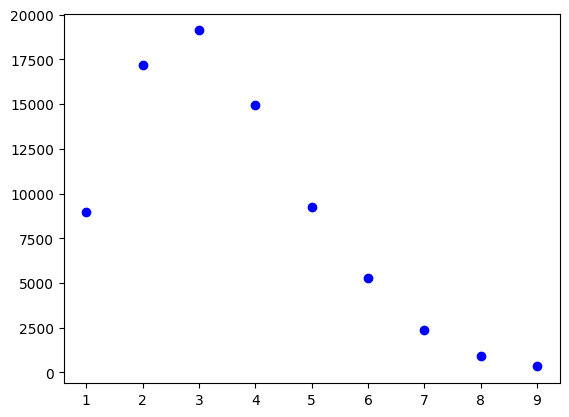

In [49]:
plt.plot(d.keys(), d.values(), "bo")